In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv(r'/Users/issackondreddy/Desktop/Projects/Fraud Detection System/DS/data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Shape of the dataset:", data.shape)
print(data.info())

Shape of the dataset: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     28480

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


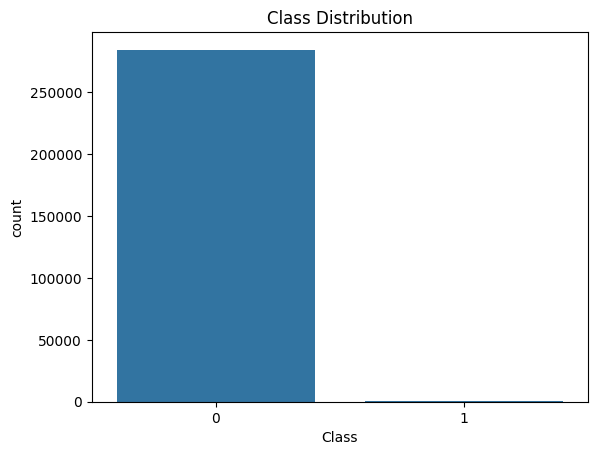

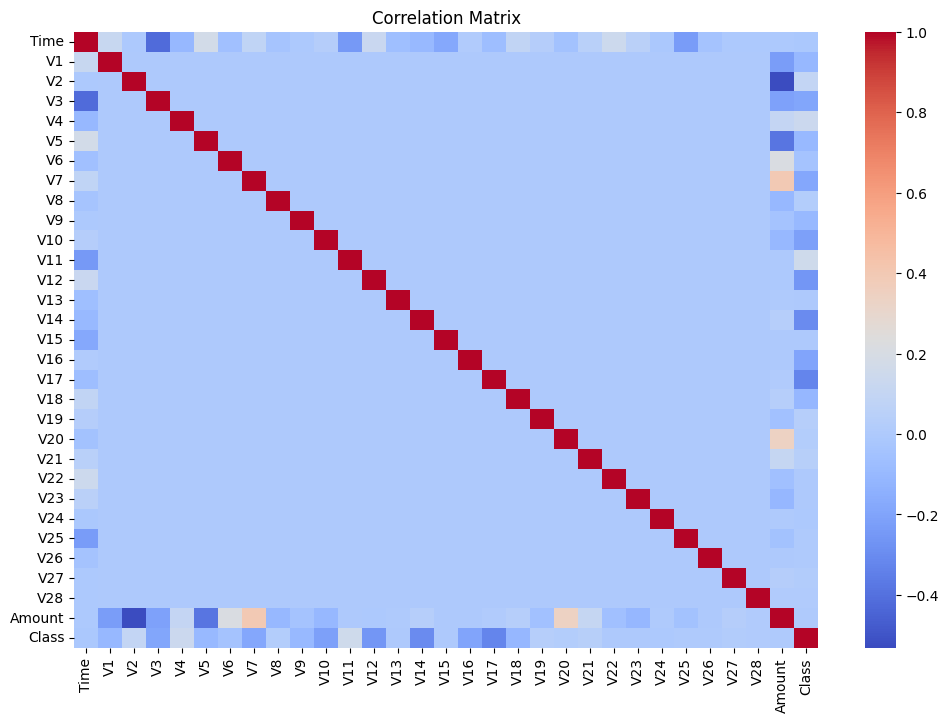

In [5]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Check class distribution
print(data['Class'].value_counts())

# Plot the class distribution to highlight the imbalance
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the 'Amount' and 'Time' columns
data['Scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Scaled_Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Drop original 'Amount' and 'Time' columns
data = data.drop(['Amount', 'Time'], axis=1)

# Reorganize the columns
scaled_columns = ['Scaled_Time', 'Scaled_Amount'] + [col for col in data.columns if col not in ['Scaled_Time', 'Scaled_Amount']]
data = data[scaled_columns]

print("Scaled data preview:\n", data.head())

Scaled data preview:
    Scaled_Time  Scaled_Amount        V1        V2        V3        V4  \
0    -1.996583       0.244964 -1.359807 -0.072781  2.536347  1.378155   
1    -1.996583      -0.342475  1.191857  0.266151  0.166480  0.448154   
2    -1.996562       1.160686 -1.358354 -1.340163  1.773209  0.379780   
3    -1.996562       0.140534 -0.966272 -0.185226  1.792993 -0.863291   
4    -1.996541      -0.073403 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       

Original class distribution: Class
0    284315
1       492
Name: count, dtype: int64
Resampled class distribution: Class
0    284315
1    284315
Name: count, dtype: int64


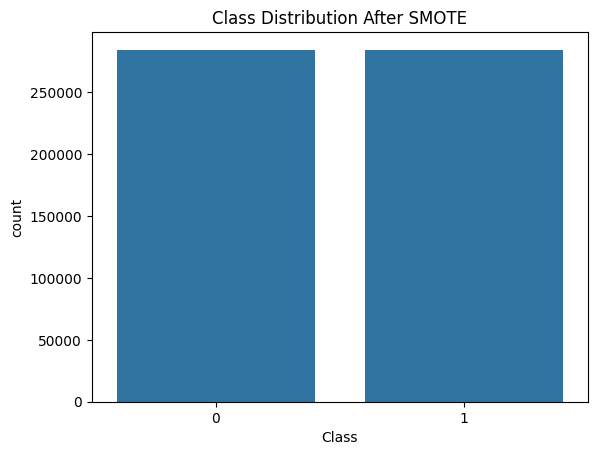

In [7]:
# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Class'] = y_resampled

print(f"Original class distribution: {y.value_counts()}")
print(f"Resampled class distribution: {y_resampled.value_counts()}")

# Plot the new class distribution
sns.countplot(x='Class', data=data_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

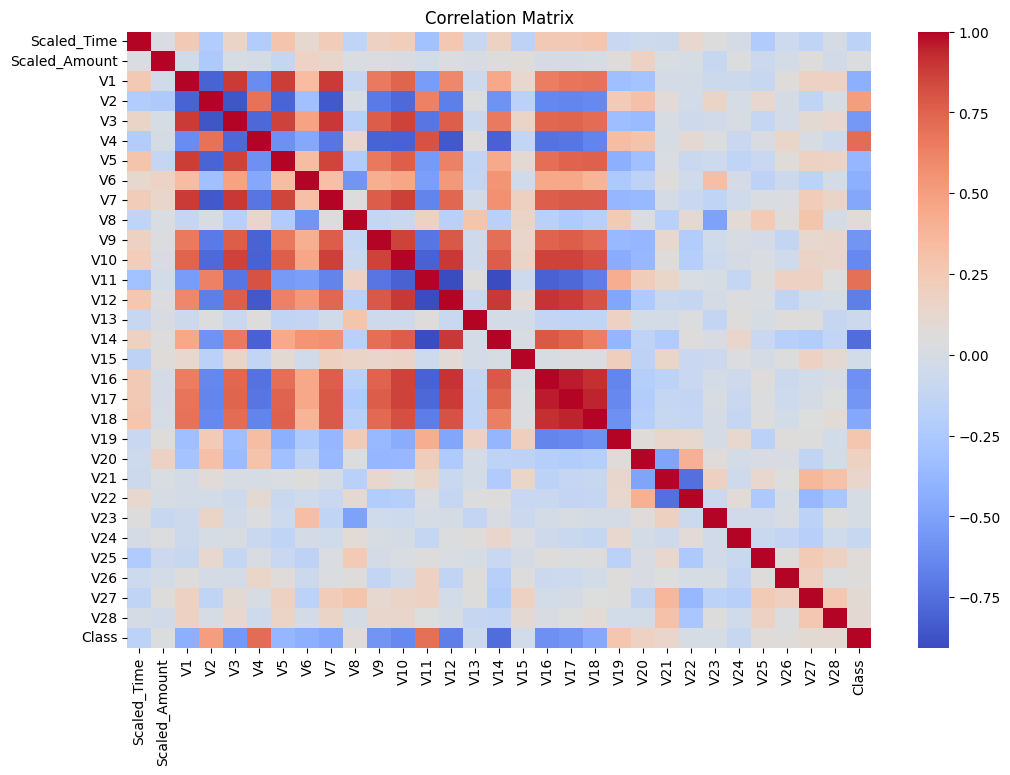

In [12]:
# Correlation matrix
corr_matrix = data_resampled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Check for missing values
print("Missing values in dataset:\n", data_resampled.isnull().sum())


Missing values in dataset:
 Scaled_Time      0
Scaled_Amount    0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
dtype: int64


In [15]:
# Detecting outliers using IQR
Q1 = data_resampled.quantile(0.25)
Q3 = data_resampled.quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_no_outliers)

        Scaled_Time  Scaled_Amount        V1        V2        V3        V4  \
0         -1.996583       0.244964 -1.359807 -0.072781  2.536347  1.378155   
1         -1.996583      -0.342475  1.191857  0.266151  0.166480  0.448154   
3         -1.996562       0.140534 -0.966272 -0.185226  1.792993 -0.863291   
4         -1.996541      -0.073403 -1.158233  0.877737  1.548718  0.403034   
5         -1.996541      -0.338556 -0.425966  0.960523  1.141109 -0.168252   
...             ...            ...       ...       ...       ...       ...   
284800     1.641889      -0.342515  2.039560 -0.175233 -1.196825  0.234580   
284801     1.641910      -0.342475  0.120316  0.931005 -0.546012 -0.745097   
284803     1.641952      -0.254117 -0.732789 -0.055080  2.035030 -0.738589   
284805     1.641974      -0.313249 -0.240440  0.530483  0.702510  0.689799   
284806     1.642058       0.514355 -0.533413 -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8  ...       V20  